In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx import DiGraph
import numpy as np
import os
import sys
from typing import List, Tuple

In [2]:
sys.path.append("../")
test_dir = os.path.abspath("../tests")
sys.path.append(test_dir)

In [3]:
from job_scheduler.model import Job, Operation, Schedule, ScheduledJob
from job_scheduler.optimizer import ScheduleOptimizer
from job_scheduler.scheduler import JobScheduler

In [4]:
job_1 = ScheduledJob(job_id=1, operations=[Operation(id=1, time=3), Operation(id=2, time=6)])
job_2 = ScheduledJob(job_id=2, operations=[Operation(id=1, time=10), Operation(id=2, time=1)])
job_3 = ScheduledJob(job_id=3, operations=[Operation(id=1, time=3), Operation(id=2, time=2)])
job_4 = ScheduledJob(job_id=4, operations=[Operation(id=1, time=2), Operation(id=2, time=4)])
job_5 = ScheduledJob(job_id=5, operations=[Operation(id=1, time=8), Operation(id=2, time=8)])

job_operations = [job_4, job_1, job_5, job_3, job_2]
job_operations

[ScheduledJob(job_id=4, operations=[Operation(id=1, time=2), Operation(id=2, time=4)]),
 ScheduledJob(job_id=1, operations=[Operation(id=1, time=3), Operation(id=2, time=6)]),
 ScheduledJob(job_id=5, operations=[Operation(id=1, time=8), Operation(id=2, time=8)]),
 ScheduledJob(job_id=3, operations=[Operation(id=1, time=3), Operation(id=2, time=2)]),
 ScheduledJob(job_id=2, operations=[Operation(id=1, time=10), Operation(id=2, time=1)])]

In [5]:
job_scheduler = JobScheduler(num_of_machines=2, num_ops_per_machine=2, scheduled_jobs=job_operations)
job_scheduler

In [6]:
schedule = job_scheduler.generate_schedule()
schedule

Schedule(jobs=[Job(id=4, operations={'directed': True, 'nodes': [{'id': 'J422'}, {'id': 'start'}, {'id': 'J423'}, {'id': 'J411'}], 'links': [{'source': 'start', 'target': 'J411', 'weight': 2, 'parallel_machines': [('start', 'J411'), ('start', 'J422')]}, {'source': 'start', 'target': 'J422', 'weight': 2, 'parallel_machines': [('start', 'J411'), ('start', 'J422')]}, {'source': 'J422', 'target': 'J423', 'weight': 2, 'parallel_machines': [('J422', 'J423')]}]}), Job(id=1, operations={'directed': True, 'nodes': [{'id': 'J113'}, {'id': 'J125'}, {'id': 'J124'}, {'id': 'J111'}, {'id': 'J423'}, {'id': 'J122'}], 'links': [{'source': 'J423', 'target': 'J122', 'weight': 2, 'parallel_machines': [('J423', 'J111'), ('J423', 'J122')]}, {'source': 'J423', 'target': 'J111', 'weight': 2, 'parallel_machines': [('J423', 'J111'), ('J423', 'J122')]}, {'source': 'J122', 'target': 'J124', 'weight': 2, 'parallel_machines': [('J122', 'J113'), ('J122', 'J124')]}, {'source': 'J122', 'target': 'J113', 'weight': 1, '

In [7]:
schedule.jobs[0].operations

{'directed': True,
 'nodes': [{'id': 'J422'}, {'id': 'start'}, {'id': 'J423'}, {'id': 'J411'}],
 'links': [{'source': 'start',
   'target': 'J411',
   'weight': 2,
   'parallel_machines': [('start', 'J411'), ('start', 'J422')]},
  {'source': 'start',
   'target': 'J422',
   'weight': 2,
   'parallel_machines': [('start', 'J411'), ('start', 'J422')]},
  {'source': 'J422',
   'target': 'J423',
   'weight': 2,
   'parallel_machines': [('J422', 'J423')]}]}

In [9]:
fig_size = (4, 4)

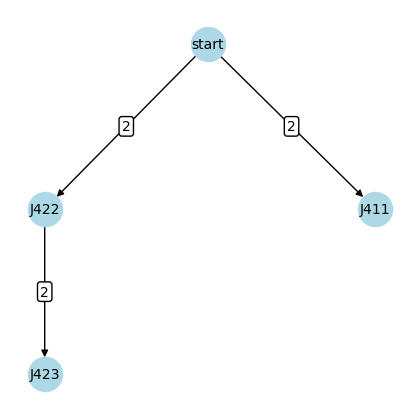

In [10]:
j4_schedule = JobScheduler.load_graph(schedule.jobs[0].operations)
JobScheduler.visualize_schedule(j4_schedule, fig_size)

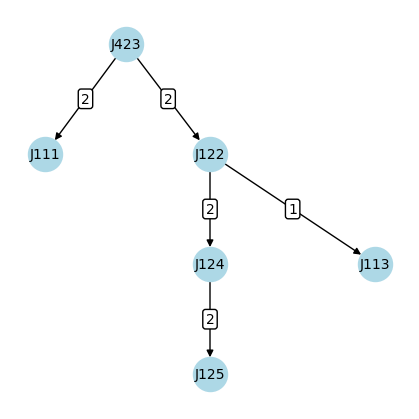

In [12]:
j1_schedule = JobScheduler.load_graph(schedule.jobs[1].operations)
JobScheduler.visualize_schedule(j1_schedule, fig_size)